In [61]:
import ipywidgets as widgets
from IPython.display import display

style = {'description_width': 'initial'}

In [62]:
#1 Importing essential libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

## Load the Dataset

In [63]:
file_name = 'iris.csv'

#Importing dataset
dataset = pd.read_csv(file_name, delimiter=',', names=['sepal length', 'sepal width',
                                                       'petal length', "petal width",
                                                      'Species'])

dataset

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [64]:
print(f"Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

Dataset has 150 rows and 5 columns.


## Plot Variables

In [65]:
#Plotting the relation 
wig_col = widgets.Dropdown(
                options=[col for col in dataset.columns.tolist() if col.startswith(('sepal', 'petal'))],
                description='Choose a Column to Plot vs. Attributes',
                disabled=False,
                layout=widgets.Layout(width='40%', height='40px'),
                style=style)

Dropdown(description='Choose a Column to Plot vs. Attributes', layout=Layout(height='40px', width='40%'), opti…

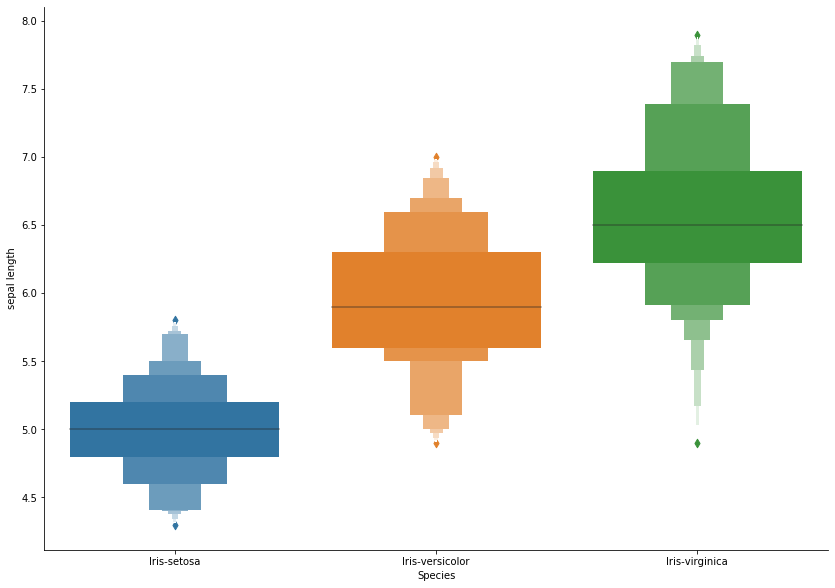

In [66]:
display(wig_col)

sns.catplot(x="Species", y=wig_col.value, kind="boxen", data=dataset, height=8.27, aspect=11.7/8.27);

Dropdown(description='Choose a Column to Plot vs. Attributes', layout=Layout(height='40px', width='40%'), opti…

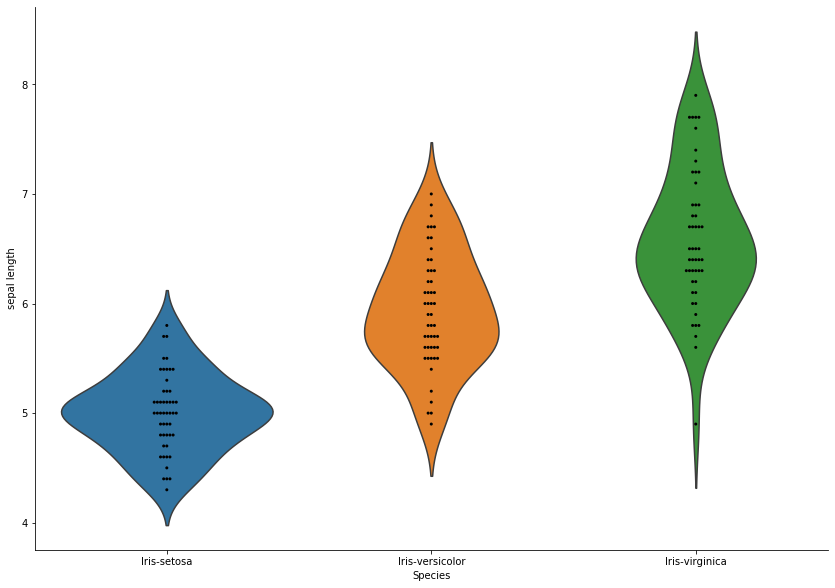

In [67]:
g = sns.catplot(x="Species", y=wig_col.value, kind="violin", inner=None, data=dataset, height=8.27, aspect=11.7/8.27)
sns.swarmplot(x="Species", y=wig_col.value, color="k", size=3, data=dataset, ax=g.ax);

display(wig_col)

In [68]:
#3 classify dependent and independent variables
X = dataset.iloc[:,:-1].values  #independent variable 
y = dataset.iloc[:,-1].values  #dependent variable 

In [69]:
print("\nIdependent Variable (Sepal and Petal Attributes):\n\n", X[:5])
print("\nDependent Variable (Species):\n\n", y[:5])


Idependent Variable (Sepal and Petal Attributes):

 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Dependent Variable (Species):

 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


## Encode Classes

In [70]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset['Species'] = labelencoder.fit_transform(dataset['Species'])

In [71]:
dataset['Species'].unique()

array([0, 1, 2], dtype=int64)

## Create Train and Test Sets

In [72]:
#4 Creating training set and testing set
from sklearn.model_selection import train_test_split
test_size = widgets.FloatSlider(min=0.01, max=0.6, value=0.2, description="Test Size :", tooltips=['Usually 20-30%'])
display(test_size)

FloatSlider(value=0.2, description='Test Size :', max=0.6, min=0.01)

In [73]:
#Divide the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=test_size.value, random_state = 0) 

In [74]:
print("Training Set :\n----------------\n")
print("X = \n", X_train[:5])
print("y = \n", y_train[:5])

print("\n\nTest Set :\n----------------\n")
print("X = \n",X_test[:5])
print("y = \n", y_test[:5])

Training Set :
----------------

X = 
 [[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]
y = 
 ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica']


Test Set :
----------------

X = 
 [[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]
y = 
 ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']


In [75]:
print(f"Shape of Training set is {X_train.shape}")
print(f"Shape of Testing set is {X_test.shape}")

Shape of Training set is (120, 4)
Shape of Testing set is (30, 4)


## Normalise Features

 As the Features are not in the range of 0-1, Let's normalize the features using Standard Scaler(Z-score) normalization and Label Encode the Class String Names.

In [76]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

print("\n-------------------------\nDataset after Scaling:\n-------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


-------------------------
Dataset after Scaling:
-------------------------


X_train :
 [[ 0.61303014  0.10850105  0.94751783  0.736072  ]
 [-0.56776627 -0.12400121  0.38491447  0.34752959]
 [-0.80392556  1.03851009 -1.30289562 -1.33615415]
 [ 0.25879121 -0.12400121  0.60995581  0.736072  ]
 [ 0.61303014 -0.58900572  1.00377816  1.25412853]]
-------------------------

X_test :
 [[-0.09544771 -0.58900572  0.72247648  1.5131568 ]
 [ 0.14071157 -1.98401928  0.10361279 -0.30004108]
 [-0.44968663  2.66602591 -1.35915595 -1.33615415]
 [ 1.6757469  -0.35650346  1.39760052  0.736072  ]
 [-1.04008484  0.80600783 -1.30289562 -1.33615415]]


## Naive-Bayes Classifier

In [77]:
# import Naive-Bayes library
from sklearn.naive_bayes import GaussianNB

## Predict and Evaluate the Model

In [78]:
classifier = GaussianNB()

#Feed the training data to the classifier
classifier.fit(X_train,y_train)

#Predicting the species for test set
y_pred = classifier.predict(X_test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",y_pred)
print("\n---------------------------\n")
print("Actual Values for Test Set :\n",y_test)



---------------------------

Predicted Values for Test Set :
 ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']

---------------------------

Actual Values for Test Set :
 ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iri

## Actual vs Predicted

In [79]:
#8 Claculating the Accuracy of the predictions
from sklearn import metrics
print("Prediction Accuracy = ", metrics.accuracy_score(y_test, y_pred))

#9 Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Salaries \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred})

error_df

Prediction Accuracy =  0.9666666666666667

Actual vs Predicted Salaries 
------------------------------



,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [80]:
#Using confusion matrix to find the accuracy
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)

accuracy = cm.diagonal().sum()/cm.sum()

print("\n---------------------------\n")
print("Accuracy of Predictions = ",accuracy)

print("\n---------------------------\n")
print(classification_report(y_test, y_pred))


---------------------------

Accuracy of Predictions =  0.9666666666666667

---------------------------

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

